# Lasso Regression (L1-регуляризація)

Тут я розгляну:
1. Мотивацію появи Lasso Regression
2. Математичну модель та формулу
3. Ефект L1-регуляризації на коефіцієнти
4. Практичний експеримент із порівнянням Linear, Ridge та Lasso


## 1. Мотивація

- Класична лінійна регресія може перенавчатися (overfitting)
- Колінеарність або зайві ознаки роблять коефіцієнти нестабільними
- Lasso Regression додає L1-шраф → не тільки зменшує ваги, а й обнуляє деякі
- Це дозволяє автоматично виконувати **відбір ознак**


## 2. Математика

Цільова функція Lasso Regression:

$J(w) = \text{MSE}(y, Xw) + \lambda \sum_{i=1}^{n} |w_i|$

- $\lambda$ – коефіцієнт регуляризації
- L1-шраф = сума модулів коефіцієнтів
- Деякі $w_i$ можуть стати рівними нулю → ознака фактично виключається


## 3. Ефект

- Зменшує вплив шумних або малозначущих ознак
- Деякі коефіцієнти стають нульовими → автоматичний відбір ознак
- На графіку це видно як стовпчики, де деякі коефіцієнти = 0


## 4. Експеримент: порівняння Linear vs Ridge vs Lasso


In [1]:
# 4.1 Імпорт бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

np.random.seed(42)


In [2]:
# 4.2 Створимо багатофакторні дані (10 ознак)
n_samples = 50
n_features = 10

# Генеруємо X
X = np.random.randn(n_samples, n_features)

# Створимо коефіцієнти: перші 3 значущі, решта шум
true_coef = np.array([3, 1.5, -2] + [0]*(n_features-3))
y = X @ true_coef + np.random.randn(n_samples)*0.5  # додаємо шум


In [3]:
# 4.3 Навчання моделей
lin_model = LinearRegression().fit(X, y)
ridge_model = Ridge(alpha=1.0).fit(X, y)
lasso_model = Lasso(alpha=0.1).fit(X, y)

# Виведемо коефіцієнти
print("Linear Regression coefficients:\n", lin_model.coef_)
print("Ridge Regression coefficients:\n", ridge_model.coef_)
print("Lasso Regression coefficients:\n", lasso_model.coef_)


Linear Regression coefficients:
 [ 2.9100114   1.34956011 -1.91910242  0.04601521  0.06052739 -0.07469264
 -0.04956436  0.12227166 -0.14671619 -0.12747857]
Ridge Regression coefficients:
 [ 2.83302457  1.29916471 -1.87164231  0.05785507  0.05340389 -0.08915403
 -0.06430312  0.12878483 -0.15671498 -0.15437277]
Lasso Regression coefficients:
 [ 2.80626219  1.2830661  -1.80759021 -0.          0.         -0.
 -0.          0.         -0.         -0.06921276]


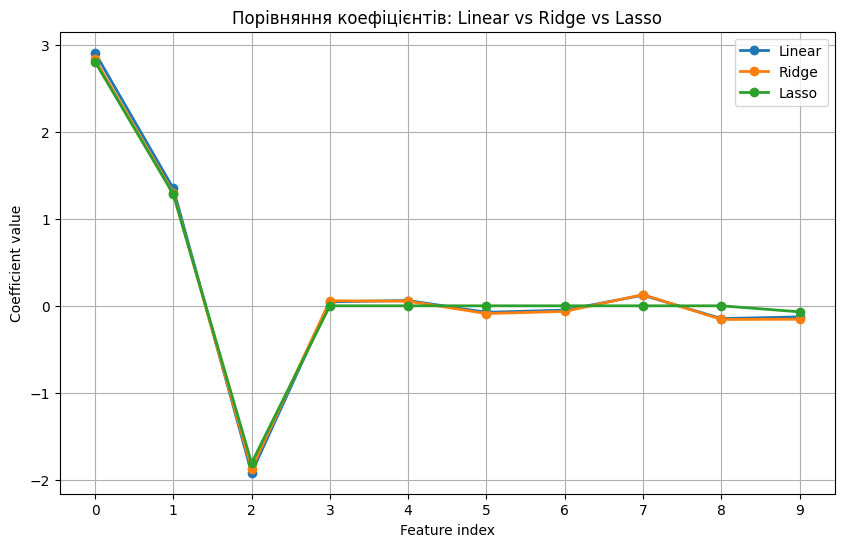

In [4]:
# 4.4 Візуалізація коефіцієнтів
models = ['Linear', 'Ridge', 'Lasso']
coefs = [lin_model.coef_, ridge_model.coef_, lasso_model.coef_]

plt.figure(figsize=(10,6))
for i, c in enumerate(coefs):
    plt.plot(range(n_features), c, marker='o', label=models[i], linewidth=2)
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Порівняння коефіцієнтів: Linear vs Ridge vs Lasso')
plt.xticks(range(n_features))
plt.grid(True)
plt.legend()
plt.show()
